In [2]:
# import pandas as pd
# cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
#        'PTRATIO', 'B', 'LSTAT', 'MEDV']
# df = pd.read_csv('Desktop/housing.csv', names=cols, header=None,delimiter=r"\s+")
# df.head()
# # df.shape

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Desktop/Datasets/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [13]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

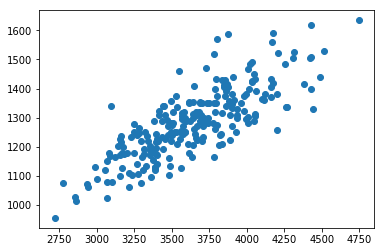

In [18]:
plt.scatter(y=y, x=X, data=data)

#### The formula goes like this -

#### y = mx+c

#### Where ,

#### c - is the y-intercept

#### m - is the slope / coefficient -> this quantity effects the values of y

#### In our example -

#### BrainWeight = m * HeadSize + constant

#### constant = BrainWeight - (m * HeadSize)

In [33]:
#  calculating m and c
def lin_reg(X,y):
    n = len(X)
    numer = 0
    denom = 0
    
    for i in range(n):
        numer += np.multiply(X[i] - np.mean(X), y[i] - np.mean(y))
        denom += (X[i]-np.mean(X))**2

    m = numer / denom
    c = np.mean(y) - m*np.mean(X)

    return(m,c)

In [34]:
def predict(X,m,c):
    y_pred = []
    for i in range(len(X)):
        y_pred.append(X[i] * m + c)
    return(y_pred)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

m, c = lin_reg(X_train, y_train)

y_pred = predict(X_test,m,c)

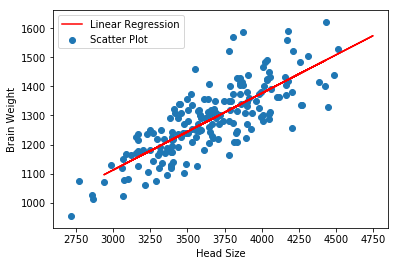

In [70]:
# some plotting
plt.plot(X_test,y_pred,color='red',label='Linear Regression')
plt.scatter(X_train,y_train,label='Scatter Plot')
plt.xlabel("Head Size")
plt.ylabel("Brain Weight")
plt.legend()
plt.show()

### Model evaluation using the root mean squared error RMSE

In [71]:
def RMSE(y_pred, y_test):
    return np.sqrt(np.sum((y_pred - y_test)**2)) / len(y_pred)

rmse = RMSE(y_pred,y_test)
print(rmse)

9.361395595966266
